## Leukemia Expression Subset

This dataset was taken from [Clustering](https://compgenomr.github.io/book/clustering-grouping-samples-based-on-their-similarity.html) in _Computational Genomics with R_.

Van der Maaten and Hinton, [Visualizing Data using t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

Hinton and Salakhutdinov, [Reducing the Dimensionality of Data with Neural Networks](https://www.cs.toronto.edu/~hinton/science.pdf)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap('microarray', {
    'red': [(0.0, 1.0, 1.0), (0.5, 0.2, 0.2), (1.0, 0.0, 0.0)],
    'green': [(0.0, 0.0, 0.0), (0.5, 0.2, 0.2), (1.0, 1.0, 1.0)],
    'blue': [(0.0, 0.0, 0.0), (0.5, 0.2, 0.2), (1.0, 0.0, 0.0)],
})

In [ ]:
#!pip install pyreadr

In [3]:
import pyreadr
result = pyreadr.read_r('data/leukemiaExpressionSubset.rds')
df = pd.DataFrame(result[None])

,ALL_GSM330151.CEL,ALL_GSM330153.CEL,ALL_GSM330154.CEL,ALL_GSM330157.CEL,ALL_GSM330171.CEL,ALL_GSM330174.CEL,ALL_GSM330178.CEL,ALL_GSM330182.CEL,ALL_GSM330185.CEL,ALL_GSM330186.CEL,...,NoL_GSM331663.CEL,NoL_GSM331666.CEL,NoL_GSM331668.CEL,NoL_GSM331670.CEL,NoL_GSM331671.CEL,NoL_GSM331672.CEL,NoL_GSM331673.CEL,NoL_GSM331674.CEL,NoL_GSM331675.CEL,NoL_GSM331677.CEL
ENSG00000224137,5.326553,3.512053,3.455480,3.472999,3.639132,3.391880,3.282522,3.682531,3.405366,3.600513,...,5.522752,3.827976,3.938008,3.995959,3.560134,5.319254,3.744973,3.975516,4.242919,3.892576
ENSG00000153253,6.436815,9.563955,7.186604,2.946697,6.949510,9.095092,3.795587,11.987291,3.215791,6.735761,...,3.207228,3.203806,3.153694,4.229497,3.294398,3.631488,3.293490,2.972615,3.511922,3.575266
ENSG00000096006,6.943404,8.840839,4.600026,4.735104,4.183136,3.049792,9.736803,3.338362,7.299087,3.696283,...,11.912955,11.647086,11.279000,11.167656,11.819935,11.303308,12.128384,12.074820,11.574398,11.574398
ENSG00000229807,3.322499,3.263655,3.406379,9.525888,3.595898,9.281170,8.946498,3.473750,3.454319,3.507047,...,3.411228,3.499283,3.377934,8.885526,8.263427,8.551265,3.303611,3.558581,3.412298,3.385382
ENSG00000138772,7.195113,8.741458,6.109578,5.631912,5.224844,3.260912,8.889246,3.052587,7.885282,4.323738,...,11.574398,10.688801,10.495324,10.544002,10.716512,10.555668,11.567757,11.303308,11.000047,11.241079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000225484,6.168956,3.219047,5.448000,3.565130,6.852792,4.469594,4.632110,4.904362,6.045215,4.723210,...,4.782641,5.526496,3.061824,4.492291,4.178567,3.257614,3.925474,3.676879,3.922306,3.876909
ENSG00000105974,3.625094,3.553951,3.945897,3.692337,3.492710,3.821098,3.892765,8.578445,3.803568,3.440693,...,4.190358,3.953033,4.011978,4.173684,4.731000,3.708780,3.513614,3.979455,3.561309,4.474555
ENSG00000113638,4.056328,3.224889,4.226629,7.217726,7.743563,6.500568,4.143836,6.102351,4.035761,4.700015,...,5.886368,4.384608,3.940642,5.469618,5.126965,5.800454,5.298204,5.693358,6.031186,5.954578
ENSG00000240350,4.659760,8.440166,5.633786,4.694977,4.896266,6.669966,4.983924,4.499198,4.888469,4.571047,...,6.389208,5.642905,6.928033,5.772205,7.776473,5.200904,5.617693,6.742470,5.158190,6.171009


<AxesSubplot:>

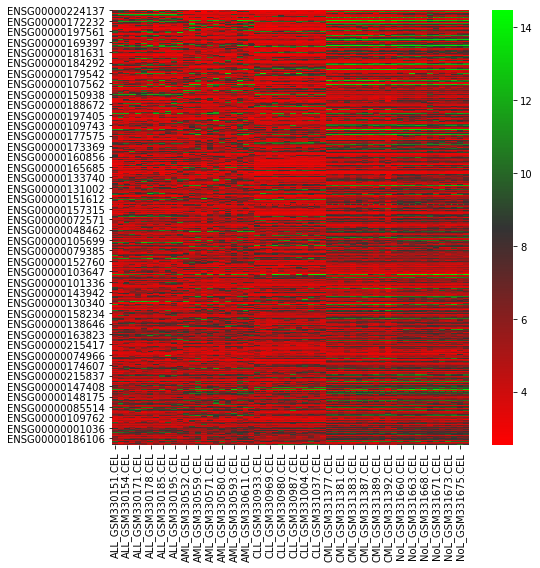

In [4]:
display(df)
plt.figure(figsize=(8,8))
sns.heatmap(df, cmap=cmap)

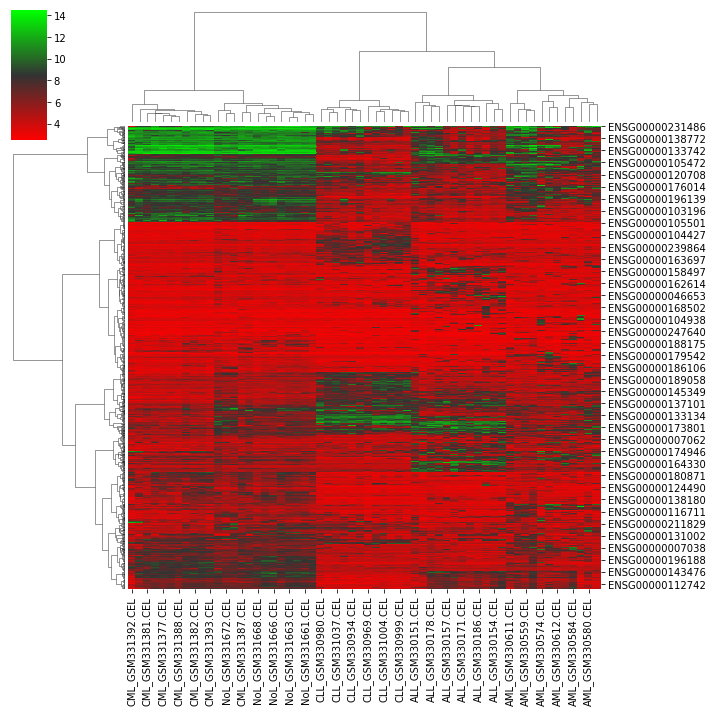

In [5]:
sns.clustermap(df, metric='euclidean', method='ward', cmap=cmap)
plt.savefig('clustermap.png')

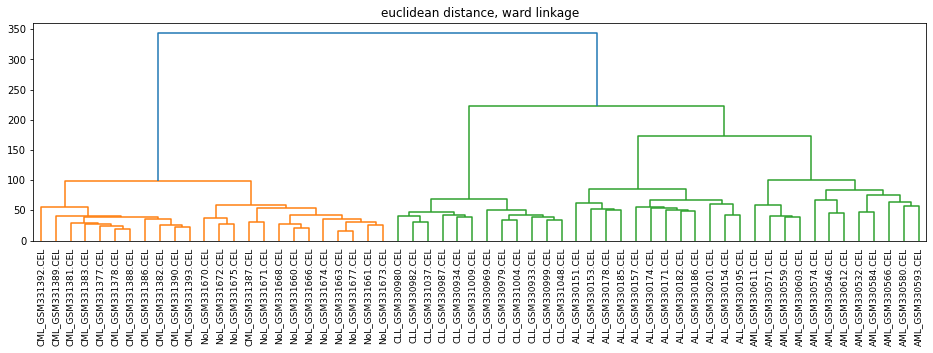

In [6]:
from scipy.cluster import hierarchy

plt.figure(figsize=(16,4))
plt.title('euclidean distance, ward linkage')
linkage = hierarchy.linkage(df.T, metric='euclidean', method='ward')
dendrogram = hierarchy.dendrogram(linkage, labels=list(df.T.index), leaf_font_size=9)

Text(0.5, 1.0, 'PCA projection')

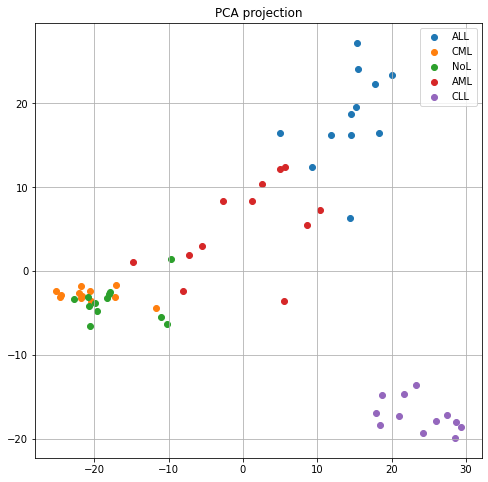

In [7]:
from sklearn import preprocessing
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)

proj = pca.fit_transform(preprocessing.scale(df.T))
proj = pd.DataFrame(proj, index=df.T.index)

plt.figure(figsize=(8,8))
for label in set(df.T.index.str[:3]):
    cond = df.T.index.str.startswith(label)
    plt.scatter(proj.loc[cond,0], proj.loc[cond,1], label=label)
plt.legend()
plt.grid(True)
plt.title('PCA projection')

Text(0.5, 1.0, 't-SNE embedding, perplexity=10')

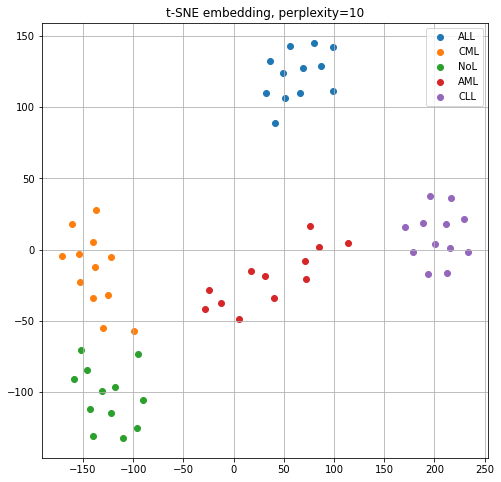

In [8]:
from sklearn import manifold

perplexity = 10
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=perplexity)
embed = tsne.fit_transform(df.T)
embed = pd.DataFrame(embed, index=df.T.index)

plt.figure(figsize=(8,8))
for label in set(df.T.index.str[:3]):
    cond = df.T.index.str.startswith(label)
    plt.scatter(embed.loc[cond,0], embed.loc[cond,1], label=label)
plt.legend()
plt.grid(True)
plt.title('t-SNE embedding, perplexity=%d' % perplexity)